# CHEMICAL REACTIONS IN BIOLOGICAL SYSTEMS

<img src=https://wou.edu/chemistry/files/2018/12/cellular-drug-targets.png alt="image info" />

## OBJECTIVE
The objective of this task is to build as good a model as possible so as to relate molecular information, to an actual biological response.

## DATA
* Each row in this data set represents a molecule. 
* The first column contains experimental data describing an actual biological response; the molecule was seen to elicit this response (1), or not (0). 
* The remaining columns represent molecular descriptors (d1 through d1776), these are calculated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. 
* The descriptor matrix has been normalized.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("resources/data/train.csv")
df_test = pd.read_csv("resources/data/test.csv")

In [3]:
df_train.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(3751, 1777)

In [5]:
df_test.shape

(2501, 1776)

As per the project brief, the dependent variable is the `Activity` column. the rest of the 1776 columns are the independent variables.

## DATA CLEANSING

### How Normal is the Data?

In [6]:
# checking the maximum and minimum values for the variables
descr_df = df_train.describe()

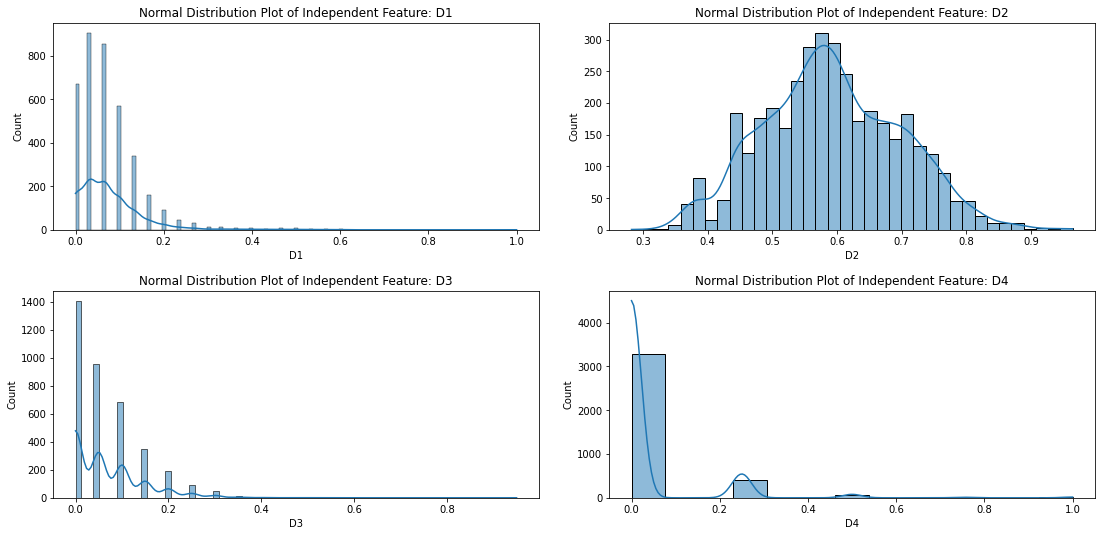

In [7]:
# creating distribution plot of the first 4 features, excluding the dependent variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
# adjust subplots' spacing so titles and xlabels don't overlap by adjusting the pad values
fig.tight_layout(pad=4, h_pad=None, w_pad=None, rect=None)

columns = list(df_train.columns)[1:5]

col = 0
for axs in axes:
    for ax in axs:
        #violin plots using seaborn library
        sns.histplot(df_train[columns[col]], ax = ax, kde = True)
        ax.set_title("Normal Distribution Plot of Independent Feature: "+ columns[col])
        col = col + 1
        if col == len(columns):
            break

plt.show()

In [8]:
descr_df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# checking if trully all the columns were normalised to [0,1]
descr_df_transposed = descr_df.transpose()
max = descr_df_transposed['max'][descr_df_transposed['max'] > 1].count()
min = descr_df_transposed['min'][descr_df_transposed['min'] < 0].count()
print ("Number of features having values more than 1: ", max)
print ("Number of features having values less than 0: ", min)

Number of features having values more than 1:  0
Number of features having values less than 0:  0


In [10]:
descr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Columns: 1777 entries, Activity to D1776
dtypes: float64(1777)
memory usage: 111.4+ KB


Observations:
* All the dependent features are of type `Float`.
* All the features have been normalised to `[0,1]`.
* The mean of several features shown is not the expected value of 0.5. This is an indication of presence of outliers.
* Some features seem to have only two values: `0`, and `1`. This is because the `min`, `25%`, `50%`, `75%` and `max` values are either `0` or `1`.

## EXPLORATORY DATA ANALYSIS

### Missing Values

In [11]:
df_null = df_train.isna().sum().reset_index()
df_null[df_null[0] == 0].count()

index    1777
0        1777
dtype: int64

Therefore, no feature has missing values

### Binary Features

In [12]:
# checking how many column have binary values
binary_df = df_train.nunique().reset_index()
# a column that has two unique values is a binary column
binary_columns = list(binary_df[binary_df[0] == 2]['index'])
print("Columns having binary values are: ", len(binary_columns))
print("A sample of the 836 binary columns: ", binary_columns[:10], " ...")

# checking to see if the binary values are 1 and 0:
count = 0
uniquebinary = []
for col in binary_columns:
    if df_train[col].max() ==1 and df_train[col].min() == 0:
        count = count + 1
    else:
        uniquebinary.append(col)
print ("Number of binary columns whose values are 1 and 0 are:", count,
        "and they constitute ", round((count*100/len(binary_columns)),2),"% of the binary columns.")
if len(uniquebinary) > 0:
    print ("Binary columns whose values are not 1 and 0 are: ", uniquebinary)

Columns having binary values are:  836
A sample of the 836 binary columns:  ['Activity', 'D23', 'D27', 'D28', 'D51', 'D72', 'D94', 'D170', 'D568', 'D823']  ...
Number of binary columns whose values are 1 and 0 are: 835 and they constitute  99.88 % of the binary columns.
Binary columns whose values are not 1 and 0 are:  ['D823']


In [13]:
# checking the composition of the identified columns()
df_train['D823'].describe()

count    3751.000000
mean        0.000044
std         0.002721
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.166667
Name: D823, dtype: float64

As the feature `D823` has a value (of type `float`) that is `not equal to 1` in addition to zero, it will not be considered as being a binary feature. These are possibly outputs of data vectorisation and one-hot encoding that was done before the data was availed to us.

In [14]:
# removing the identified column and having a purely [0,1] binary columns list
binary_columns = [x for x in binary_columns if x not in uniquebinary]
len(binary_columns)

835

In [15]:
import random

ind = []
i = len(ind)
while i < 28:
    j = random.randint(0,len(binary_columns)-1)
    if j not in ind:
        ind.append(j)
    i = len(ind)

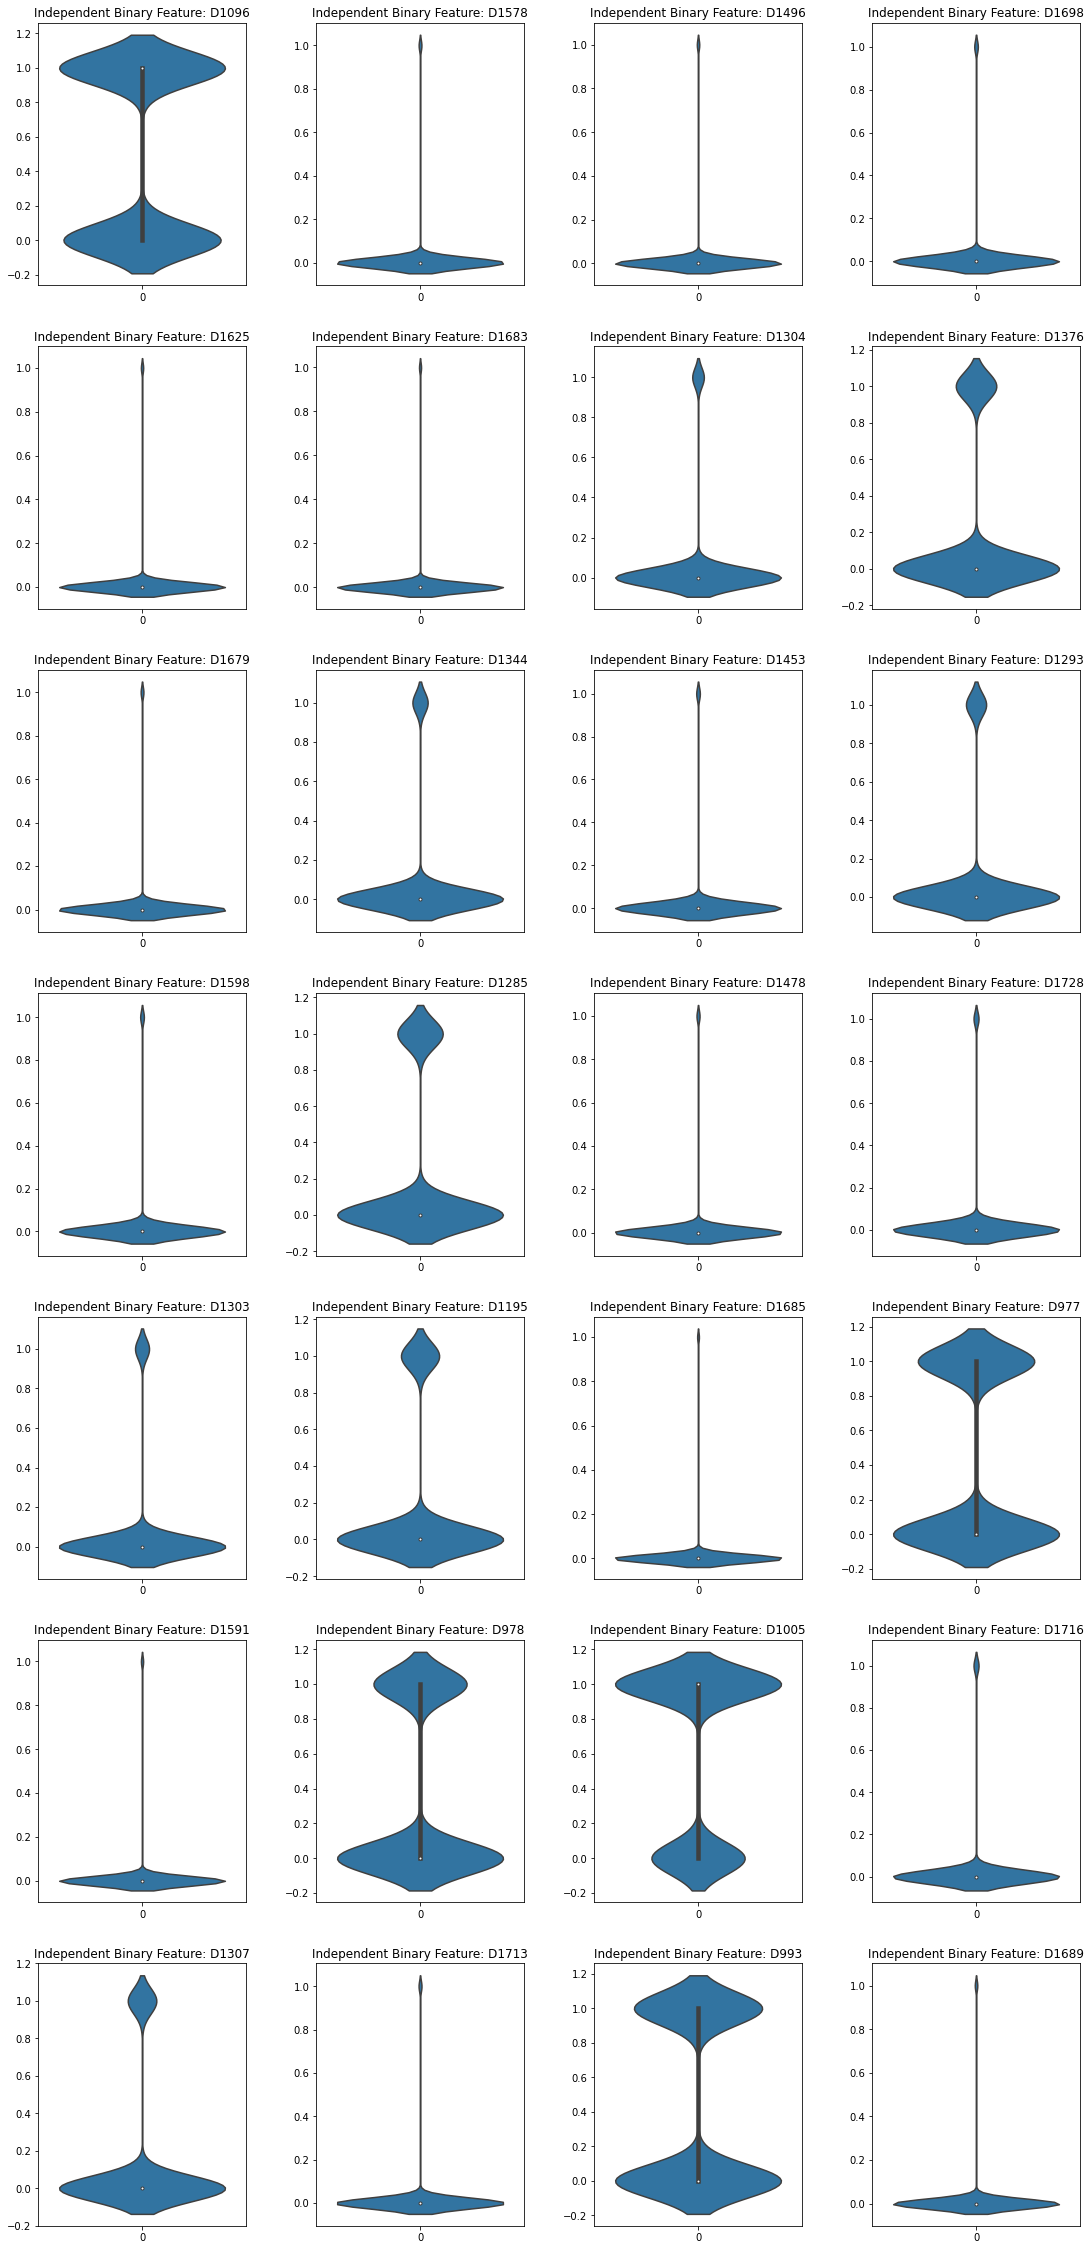

In [16]:
# creating distribution plot of a sample 4 binary features, excluding the dependent variable
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(16, 32))
# adjust subplots' spacing so titles and xlabels don't overlap by adjusting the pad values
fig.tight_layout(pad=4, h_pad=None, w_pad=None, rect=None)

columns = binary_columns
# columns = binary_columns[:4]
col = 0
for axs in axes:
    for ax in axs:
        #violin plots using seaborn library
        sns.violinplot(data = list(df_train[columns[ind[col]]]), ax = ax)
        ax.set_title("Independent Binary Feature: "+ columns[ind[col]])
        col = col + 1
        if col == len(columns):
            break

plt.show()

As the dependent variable is a binary feature, binary classification algorithms will be considered. These will include:
1. Naive Bayes
2. Logistic Regression
3. K-Nearest Neighbours
4. Support Vector Machine
5. Decision Tree
6. Bagging Decision Tree (Ensemble Learning I)
7. Boosted Decision Tree (Ensemble Learning II)
8. Random Forest (Ensemble Learning III)
9. Voting Classification (Ensemble Learning IV)
10. Neural Network (Deep Learning)

They are described here: https://towardsdatascience.com/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2

### Outliers

Kurtosis is a measure of the “tailedness” of the probability distribution. A standard normal distribution has kurtosis of 3 and is recognized as mesokurtic. An increased kurtosis (>3) can be visualized as a thin “bell” with a high peak whereas a decreased kurtosis corresponds to a broadening of the peak and “thickening” of the tails. Kurtosis >3 is recognized as leptokurtic and <3 as platykurtic (lepto=thin; platy=broad).

Playkurtic: it tends to produce fewer and less extreme outliers than the normal distribution.

Leptokurtic: it tends to produce more outliers than the normal distribution.

<img src='resources/images/distribution.png' alt="image info" />

D : Laplace distribution, also known as the double exponential distribution, red curve (two straight lines in the log-scale plot), excess kurtosis = 3

S : hyperbolic secant distribution, orange curve, excess kurtosis = 2

L : logistic distribution, green curve, excess kurtosis = 1.2

N : normal distribution, black curve (inverted parabola in the log-scale plot), excess kurtosis = 0

C : raised cosine distribution, cyan curve, excess kurtosis = −0.593762...

W : Wigner semicircle distribution, blue curve, excess kurtosis = −1

U : uniform distribution, magenta curve (shown for clarity as a rectangle in both images), excess kurtosis = −1.2.

For the task, we will remove the binary columns from the dataset, as these should not be evaluated for outliers.

In [17]:
# extracting columns for continuous features
columns = list(df_train.columns)
normal_columns = [x for x in columns if x not in binary_columns]
normal_columns.append('Activity')
df = df_train[normal_columns]

In [18]:
ind2 = []
i = len(ind2)
while i < 28:
    j = random.randint(0,len(normal_columns)-1)
    if j not in ind2:
        if j not in ind:
            ind2.append(j)
    i = len(ind2)

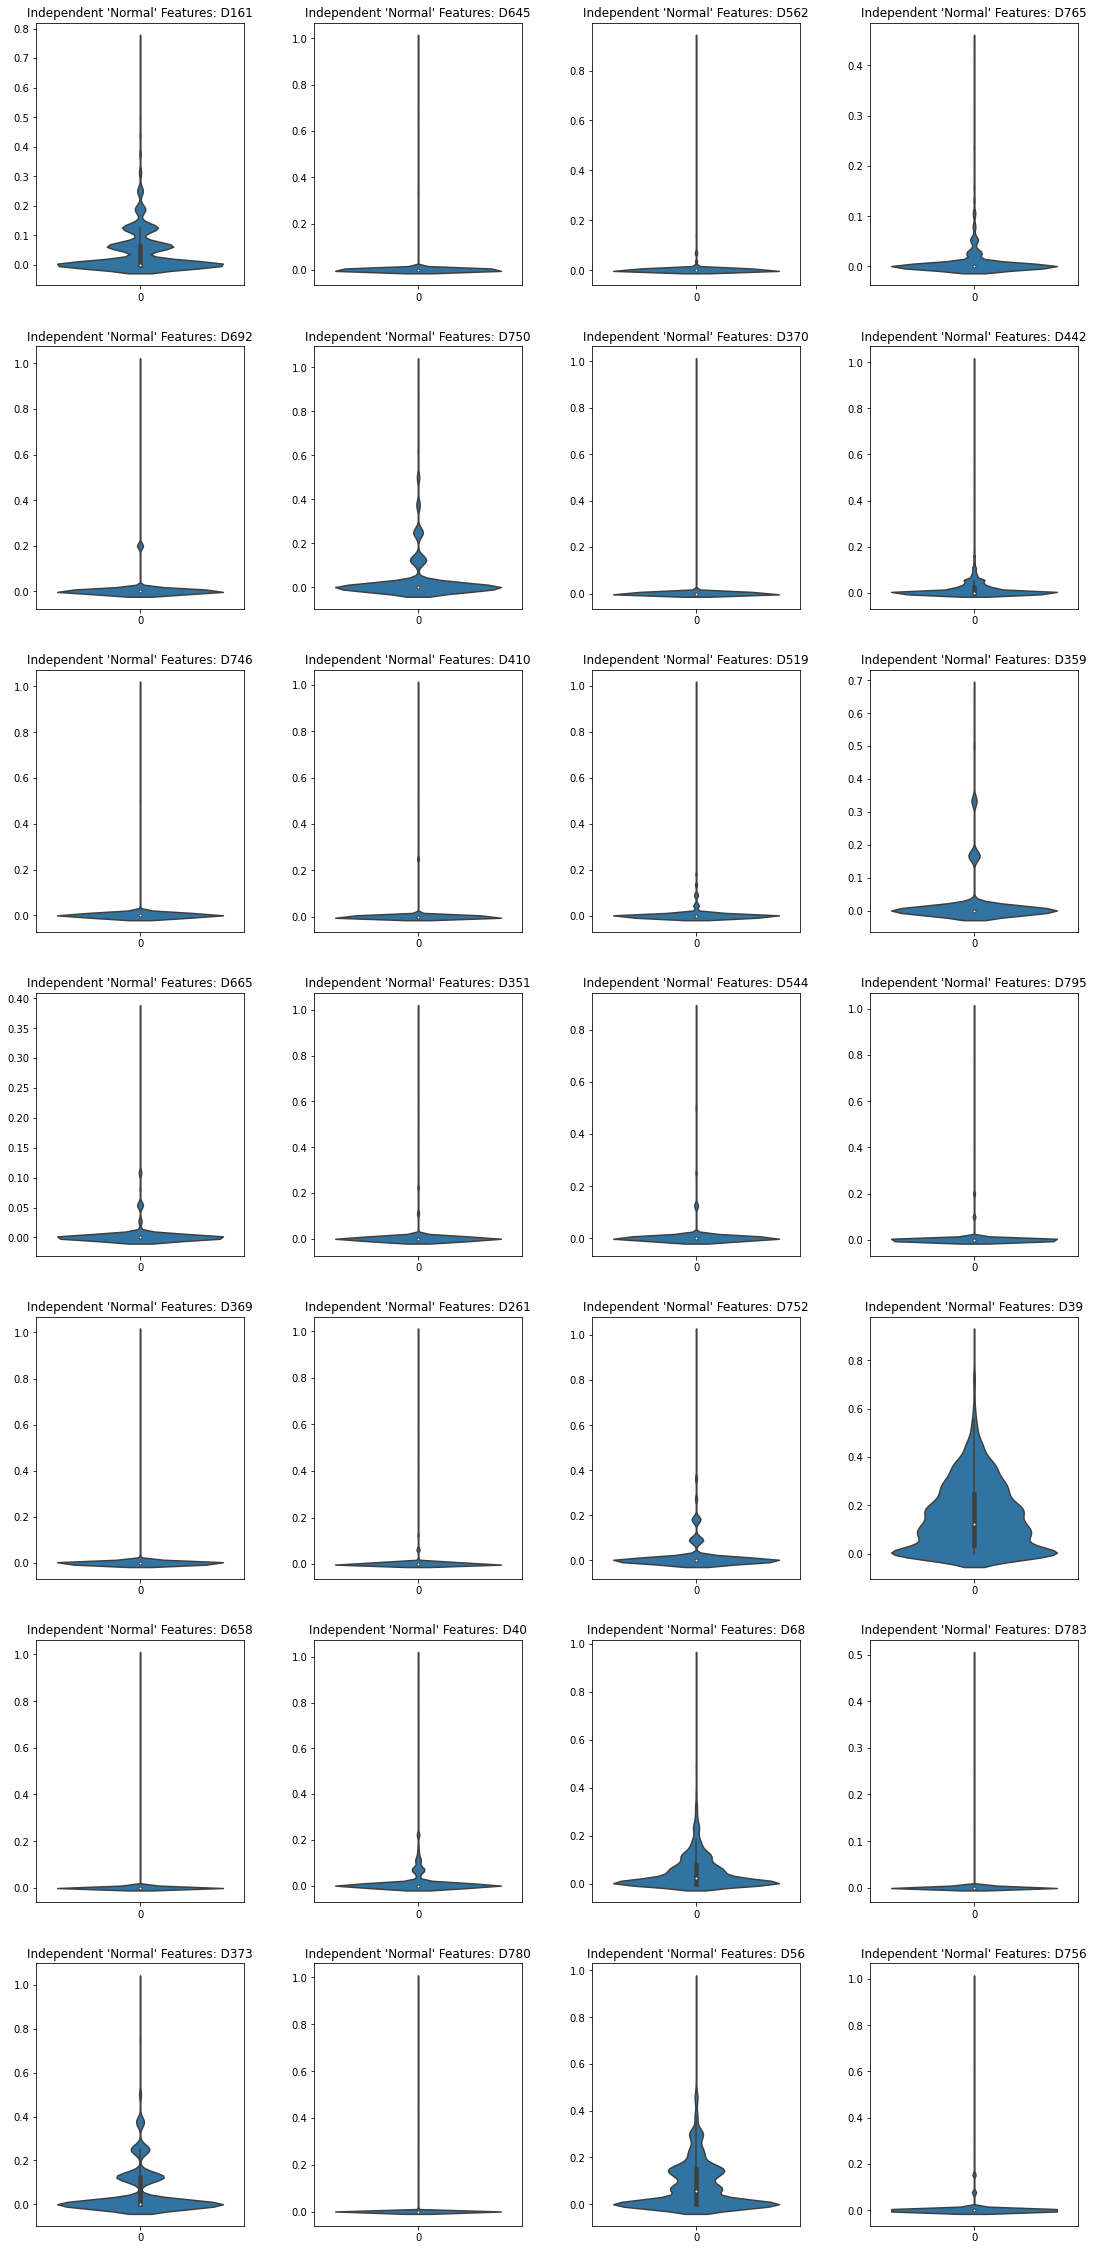

In [19]:

# creating distribution plot of a sample 28 'normal' features, excluding the dependent variable and binary features
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(16, 32))
# adjust subplots' spacing so titles and xlabels don't overlap by adjusting the pad values
fig.tight_layout(pad=4, h_pad=None, w_pad=None, rect=None)

columns = normal_columns
# columns = binary_columns[:28]
col = 0
for axs in axes:
    for ax in axs:
        #violin plots using seaborn library
        sns.violinplot(data = list(df_train[columns[ind[col]]]), ax = ax)
        ax.set_title("Independent 'Normal' Features: "+ columns[ind[col]])
        col = col + 1
        if col == len(columns):
            break

plt.show()

In [20]:
df.kurtosis()

D1           19.354861
D2           -0.277627
D3            8.935350
D4           20.548969
D5            4.192214
               ...    
D948        201.866125
D949          2.952185
D950         17.122472
D951         12.860410
Activity     -1.972255
Length: 943, dtype: float64

### kurtosis plotting

In [21]:
# application of kurtosis to identify possibility of outliers
# kurtosis values greater than 3
kurt = df.kurtosis()
count = 0
for i in kurt:
    if i > 3:
        count = count + 1 
print ("Number of features that have outliers: ",count)

Number of features that have outliers:  882


### Correlation

In [22]:
# checking correlation of the variables
correlation = df_train.corr()

In [23]:
# correlation of independent variables with the dependent variable, `Activity`
top20 = correlation['Activity'].sort_values()[:10].append(correlation['Activity'].sort_values()[-10:])

C:\Users\Win10\AppData\Local\Temp\ipykernel_18208\3277050280.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top20 = correlation['Activity'].sort_values()[:10].append(correlation['Activity'].sort_values()[-10:])


In [24]:
# getting the features that have the 
# top 20 highest correlation values with the `Activity` variable
top20

D217       -0.233387
D87        -0.223081
D187       -0.198590
D158       -0.197721
D60        -0.180185
D61        -0.174588
D173       -0.169300
D175       -0.162607
D129       -0.153477
D103       -0.151922
D660        0.204864
D209        0.210154
D607        0.210270
D146        0.213311
D659        0.226049
D747        0.226468
D182        0.228664
D469        0.268601
D27         0.472340
Activity    1.000000
Name: Activity, dtype: float64

### Multi-Collinearity

Read: https://www.analyticsvidhya.com/blog/2021/03/multicollinearity-in-data-science/, https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b

It describes the occurrence of two exploratory variables in a linear regression model that is found to be correlated through adequate analysis and a predetermined degree of accuracy.

Multicollinearity does not have a massive bearing on a model’s predictive capabilities. It is important when building models to gain more insight into the nature of the predictive features.

### Imbalanced Dependent Variable

read more: https://machinelearningmastery.com/what-is-imbalanced-classification/

In [25]:
df_train.groupby(by = 'Activity').count()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
Activity,,,,,,,,,,,,,,,,,,,,,
0,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,...,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717
1,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,...,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034


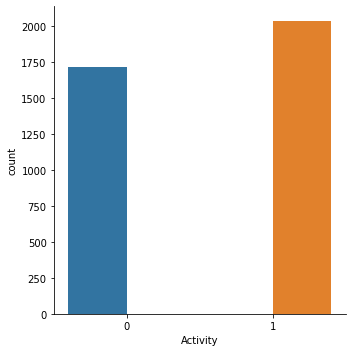

In [26]:
import seaborn as sns
# visual representation of the balance of the binary features
sns.catplot(x='Activity',hue='Activity',data=df,kind="count")

It can be seen that:
* Binary 0: 1,717 observations
* Binary 1: 2,034 observations

Therefore, the binaries in the observation are approximately balanced, with slightly more Binary 1 observations (317 observations, 18% difference over the lower value).

No more action on imbalance is required.

### Molecule Clusters in the Dataset

In [27]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import timeit

#### *Rough Estimation using Elbow Method*

In [28]:
df = df_train.copy()
df = df.drop("Activity", axis = 1)

# calculate k using python, with the elbow method
inertia = []

# define our possible k values
possible_K_values = [i for i in range(2,100)]

# we start with 2, as we can not have 0 clusters in k means, and 1 cluster is just a dataset
model_time = []
# iterate through each of our values
for each_value in possible_K_values:
    t_0 = timeit.default_timer()
    # iterate through, taking each value from 
    model = KMeans(n_clusters=each_value, init='k-means++',random_state = 42)
    
    # fit it on YOUR dataframe
    model.fit(df)
    
    # append the inertia to our array
    inertia.append(model.inertia_)

    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_time.append(elapsed_time)

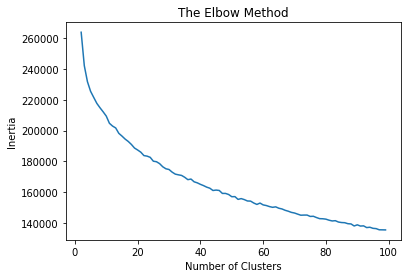

In [29]:
plt.plot(possible_K_values, inertia)
#plt.plot(possible_K_values, model_time)
plt.title('The Elbow Method')

plt.xlabel('Number of Clusters')

plt.ylabel('Inertia')

plt.show()

#### *Refining using Silhoutte Score*

In [30]:
# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values_refined = [i for i in range(10,40)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    model = KMeans(n_clusters = each_value, init='k-means++',random_state = 42)
    
    # fit it
    model.fit(df)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df, model.predict(df))


    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
keys = []
values = []
for key, val in bad_k_values.items():
    keys.append(key)
    values.append(val)
min_neg_val_index = values.index(pd.Series(values).min())
print(f' Most optimum number of clusters is {keys[min_neg_val_index]}')

 Most optimum number of clusters is 87


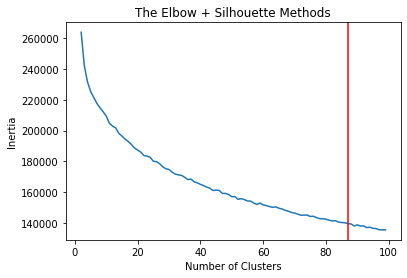

In [31]:
optimum_cluster = 87
y = []
for i in range(0,260000):
    y.append(i)


plt.plot(possible_K_values, inertia)
plt.axvline(optimum_cluster, color = 'r')
plt.title('The Elbow + Silhouette Methods')
plt.xlabel('Number of Clusters')

plt.ylabel('Inertia')

plt.show()

## MINIMUM VIABLE MODEL

For the minimum viable model, we will implement to Naive Bayes model. The metrics from this application will be our lower bound value. Any other model that will provide a worse metric than this will be automatically rejected.

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
warnings.filterwarnings("ignore")

In [33]:
y = df_train['Activity']
columns = df_train.columns
X = df_train[columns[1:]]
# Get training and testing data, with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the model 
naive_bayes = GaussianNB()
# Fit the model 
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [34]:
# Get predictions on the test set 
y_hat = naive_bayes.predict(X_test)
# Calculate the log loss (this was imported from sklearn above somewhere) 
print("The log loss error for our model is: ", log_loss(y_test, y_hat))

The log loss error for our model is:  12.739586905970421


In [35]:
# predicting "activity" for unseen dataset
y_pred = naive_bayes.predict_proba(df_test)
#preparing submission file
l = len(df_test)
moleculeID = []
for i in range(l):
    i = i + 1
    moleculeID.append(i)
y_pred_class1 = [i[1] for i in y_pred]
y_pred_class0 = [i[0] for i in y_pred]
df_pred = pd.DataFrame({"MoleculeId": moleculeID, "PredictedProbability": y_pred_class1})
df_pred.to_csv("submissions/submission_bayes_MVM.csv", index = False)

On submission of the generated CSV to Kaggle, the score was (lower is better):
* Public score: 13.11529
* Private score: 12.34188

The leading score was `0.37355`.

It is seen that the model performs better on test data than on the validation data.
Better models or more feature engineering and hyperparameter tuning will be employed to improve the score.

In [36]:
# I will create a function that will run all the algorithms and save in a dictionary
import timeit
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

"""
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers
"""

model_names = []
model_coeffs = []
model_scores = []
model_time = []
count = 1

"""
    function to output submission files
"""
def submission(model, model_name, df_test, count):
    # predicting "activity" for unseen dataset
    l = len(df_test)+1
    try:
        y_pred = model.predict_proba(df_test)
    except AttributeError:
        y_pred = model._predict_proba_lr(df_test)
    except:
        y_pred = [x for x in range(1,l)]
    #preparing submission file
    l = len(df_test)
    moleculeID = []
    for i in range(l):
        i = i + 1
        moleculeID.append(i)
    y_pred_class1 = [i[1] for i in y_pred]
    y_pred_class0 = [i[0] for i in y_pred]
    df_pred = pd.DataFrame({"MoleculeId": moleculeID, "PredictedProbability": y_pred_class1})
    path = "submissions/"
    file_name = path + "Untuned submission No." + str(count) + " - " + model_name + ".csv"
    print (file_name)
    df_pred.to_csv(file_name, index = False)
    count = count + 1
    return count

"""
    function to fit model and generate predictions
"""
def model_fit_pred(model_, X_train, y_train, X_test, y_test):
    model_.fit(X_train, y_train)
    # coeff = model_.coef_
    coeff = 0
    y_pred = model_.predict(X_test)
    score = log_loss(y_test, y_pred)
    return coeff, score


"""
    Function that contains all relevant algorithms for prediction
"""
def models_basic (X, y, test_size, count):
    # Get training and testing data, with test size of test_size
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = test_size, 
                                                        random_state = 42)
    
    # Naives Bayes - Gaussian
    t_0 = timeit.default_timer()
    model_name = "Naive Bayes - Gaussian"
    naive_bayes = GaussianNB()
    coeff, score = model_fit_pred(naive_bayes, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(naive_bayes, model_name, df_test, count)

    # Naives Bayes - Multinomial
    t_0 = timeit.default_timer()
    model_name = "Naive Bayes - Multinomial"
    naive_bayes = MultinomialNB()
    coeff, score = model_fit_pred(naive_bayes, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(naive_bayes, model_name, df_test, count)


    # Logistic Regression
    t_0 = timeit.default_timer()
    model_name = "Logistic Regression"
    lr = LogisticRegression(max_iter=1000)
    coeff, score = model_fit_pred(lr, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(lr, model_name, df_test, count)

    # K-Nearest Neighbours
    t_0 = timeit.default_timer()
    model_name = "K-Nearest Neighbours"
    knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
    coeff, score = model_fit_pred(knn, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(knn, model_name, df_test, count)

    # Support Vector Machine
    t_0 = timeit.default_timer()
    model_name = "Support Vector Machine"
    svm=LinearSVC(C=0.0001)
    coeff, score = model_fit_pred(svm, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(svm, model_name, df_test, count)

    # Decision Tree
    t_0 = timeit.default_timer()
    model_name = "Decision Tree"
    clf = DecisionTreeClassifier()
    coeff, score = model_fit_pred(clf, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(clf, model_name, df_test, count)

    # bagging decision tree (Ensemble learning I)
    t_0 = timeit.default_timer()
    model_name = "Bagging Decision Tree"
    bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
    coeff, score = model_fit_pred(bg, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(bg, model_name, df_test, count)

    # Boosting decision tree (Ensemble learning II)
    t_0 = timeit.default_timer()
    model_name = "Boosting Decision Tree"
    adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
    coeff, score = model_fit_pred(adb, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(adb, model_name, df_test, count)

    # Random Forest (Ensemble Learning III)
    t_0 = timeit.default_timer()
    model_name = "Random Forest"
    rf = RandomForestClassifier(n_estimators=30, max_depth=9)
    coeff, score = model_fit_pred(rf, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(rf, model_name, df_test, count)

    # XGBoost Classifier
    t_0 = timeit.default_timer()
    model_name = "XGBoost Classifier"
    xgb = XGBClassifier(random_state = 42)
    coeff, score = model_fit_pred(xgb, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(xgb, model_name, df_test, count)

    """
    # Voting Classifier (Ensemble Learning IV)
    t_0 = timeit.default_timer()
    model_name = "Voting Classifier - hard"
    evc = VotingClassifier(estimators = [('naive_bayes',naive_bayes),('Linear Regression',lr),('Random Forest',rf),('SVM',svm)],
                            voting='hard', n_jobs = -1)
    coeff, score = model_fit_pred(evc, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(evc, model_name, df_test, count)

    # Voting Classifier (Ensemble Learning IV)
    t_0 = timeit.default_timer()
    model_name = "Voting Classifier - Soft"
    evc = VotingClassifier(estimators = [('naive_bayes',naive_bayes),('Linear Regression',lr),('Random Forest',rf),('SVM',svm)],
                            voting='soft', n_jobs = -1)
    coeff, score = model_fit_pred(evc, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(evc, model_name, df_test, count)

    
    # Neural Network - Deep learning
    t_0 = timeit.default_timer()
    model = "Neural Network"
    # split an additional validation dataset
    validation_split=1000
    x_validation=X_train[:validation_split]
    x_partial_train=X_train[validation_split:]
    y_validation=y_train[:validation_split]
    y_partial_train=y_train[validation_split:]
    model=models.Sequential()
    model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
    model.add(layers.Dense(16,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(x_partial_train,y_partial_train,epochs=4,batch_size=512,validation_data=(x_validation,y_validation))
    coeff = model.coef_
    y_pred = model.predict(X_test)
    score = log_loss(y_test, y_pred)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)

    # Neural Network - handling overfitting
    t_0 = timeit.default_timer()
    model = "Neural Network- Handling Overfitting"
    # add validation dataset
    validation_split=1000
    x_validation=X_train[:validation_split]
    x_partial_train=X_train[validation_split:]
    y_validation=y_train[:validation_split]
    y_partial_train=y_train[validation_split:]
    model=models.Sequential()
    model.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.003),activation='relu',input_shape=(10000,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.003),activation='relu'))
    model.add(layers.Dropout(0.6))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(x_partial_train,y_partial_train,epochs=4,batch_size=512,validation_data=(x_validation,y_validation))
    coeff = model.coef_
    y_pred = model.predict(X_test)
    score = log_loss(y_test, y_pred)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    """
    return model_names, model_coeffs, model_scores, model_time, count

In [37]:
test_size = 0.20
model_names, model_coeffs, model_scores, model_time, count = models_basic (X, y, test_size, count)

submissions/Untuned submission No.1 - Naive Bayes - Gaussian.csv
submissions/Untuned submission No.2 - Naive Bayes - Multinomial.csv
submissions/Untuned submission No.3 - Logistic Regression.csv
submissions/Untuned submission No.4 - K-Nearest Neighbours.csv
submissions/Untuned submission No.5 - Support Vector Machine.csv
submissions/Untuned submission No.6 - Decision Tree.csv
submissions/Untuned submission No.7 - Bagging Decision Tree.csv
submissions/Untuned submission No.8 - Boosting Decision Tree.csv
submissions/Untuned submission No.9 - Random Forest.csv
submissions/Untuned submission No.10 - XGBoost Classifier.csv


In [38]:
df_model_outcomes = pd.DataFrame({"Models": model_names,
                                    "Internal Log Loss Score": model_scores,
                                    "Time Lapsed (s)": model_time})

In [39]:
df_model_outcomes = df_model_outcomes.sort_values(by = "Internal Log Loss Score").set_index('Models')

In [40]:
df_model_outcomes

,Internal Log Loss Score,Time Lapsed (s)
Models,,
XGBoost Classifier,6.484723,13.725
Random Forest,6.806655,0.729
Bagging Decision Tree,7.864435,6.527
Boosting Decision Tree,8.232378,4.046
Logistic Regression,8.508325,4.482
Support Vector Machine,8.968237,0.334
K-Nearest Neighbours,9.704091,0.502
Decision Tree,10.117999,1.648
Naive Bayes - Gaussian,12.739587,0.387


Log loss score on submission to Kaggle is as shown below, from best performing to worst performing (lower is better):

|Model|Kaggle Private Score|Kaggle Public Score|
|---|---|---|
|XGBoost|0.45567|0.50041|
|Random Forest|0.46893|0.49431|
|Logistic Regression|0.53486|0.6222|
|Boosting Decision Tree|0.63142|0.65456|
|Support Vector Machine|0.64271|0.64552|
|Bagging Decision Tree|0.84348|0.94574|
|K-Nearest Neighbours|1.47296|1.91105|
|Naive Bayes - Multinomial|2.45797|2.71612|
|Naive Bayes - Gaussian|12.34188|13.11529|

In [41]:
df_model_outcomes['Kaggle Log Loss Score'] = [0.45567, 0.46893, 0.84348, 0.63142, 0.53486, 0.64271, 1.47296, 9.40804, 12.34188, 2.45797]

In [42]:
df_model_outcomes

,Internal Log Loss Score,Time Lapsed (s),Kaggle Log Loss Score
Models,,,
XGBoost Classifier,6.484723,13.725,0.45567
Random Forest,6.806655,0.729,0.46893
Bagging Decision Tree,7.864435,6.527,0.84348
Boosting Decision Tree,8.232378,4.046,0.63142
Logistic Regression,8.508325,4.482,0.53486
Support Vector Machine,8.968237,0.334,0.64271
K-Nearest Neighbours,9.704091,0.502,1.47296
Decision Tree,10.117999,1.648,9.40804
Naive Bayes - Gaussian,12.739587,0.387,12.34188


In [43]:
max = int(Plot_df["Internal Log Loss Score"].max())+2

NameError: name 'Plot_df' is not defined

In [ ]:
x_label = [x for x in range(0, max)]

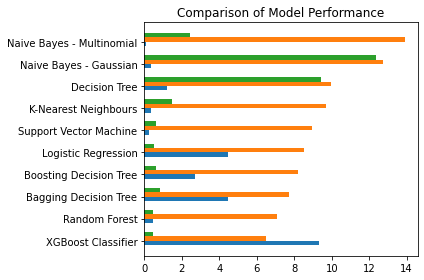

In [ ]:
Plot_df = df_model_outcomes.reset_index()

width = 0.2
N = 10
ind = np.arange(N)
fig, ax = plt.subplots()
x = np.arange(len(Plot_df['Models']))
rects1 = ax.barh(x - width/2, Plot_df['Time Lapsed (s)'], width, label = 'Time Lapsed (s)')
rects2 = ax.barh(x + width/2, Plot_df['Internal Log Loss Score'], width, label = 'Internal Log Loss Score')
rects3 = ax.barh(x + width*1.5, Plot_df['Kaggle Log Loss Score'], width, label = 'Kaggle Log Loss Score')

#ax.set_ylabel('Models')
ax.set_title('Comparison of Model Performance')
#ax.set_xticks()
ax.set_yticks(ind)
#plt.xticks(rotation = 90)
ax.set_yticklabels(Plot_df['Models'])
#ax.legend(bbox_to_anchor=(1.1, 1.1))

# ax.bar_label(rects1, padding=1)
# ax.bar_label(rects2, padding=1)
# ax.bar_label(rects3, padding=1)

fig.tight_layout()

plt.show()

In [ ]:
plt.barh(Plot_df['Kaggle Log Loss Score'], 0.8, label = 'Kaggle Log Loss Score')
ax.set_title('Comparison of Model Performance')
ax.set_yticks(ind)
ax.set_yticklabels(Plot_df['Models'])

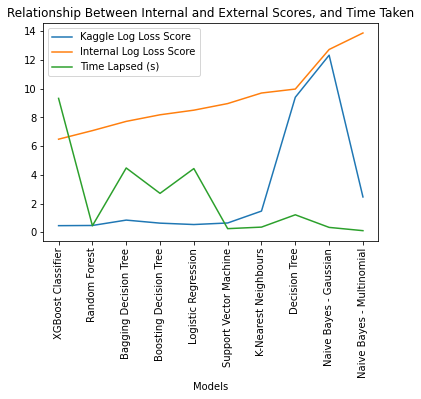

In [207]:
# plotting to show the relationship between internal and external scores, and time taken 
plt.plot(df_model_outcomes['Kaggle Log Loss Score'], label = 'Kaggle Log Loss Score')
plt.plot(df_model_outcomes['Internal Log Loss Score'], label = 'Internal Log Loss Score')
plt.plot(df_model_outcomes['Time Lapsed (s)'], label = 'Time Lapsed (s)')
plt.xlabel('Models')
plt.title("Relationship Between Internal and External Scores, and Time Taken")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

## FEATURE ENGINEERING

For feature engineering, the following will be considered:
1. Regularization of the continous independent features
2. Regularization of all the independent features

Elastic net regression wiill be used

In [44]:
# importing ElasticNet module
from sklearn.linear_model import ElasticNet

### a) Regularization of Continous Independent Features

In [45]:
# Get training and testing data, with test size of test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = test_size, 
                                                        random_state = 42)

In [46]:
# normal_columns list contains column headers for continuous independent features
normal_features = normal_columns[:-1]
print(len(normal_features))

942


There are 942 continuous features

In [47]:
# creating elstic net model object, with alpha at 1.0
elastic = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
# fitting model to the dataset
elastic.fit(X_train[normal_features], y_train)
# Extracting the intercept from the model
intercept_elastic = float(elastic.intercept_)
print("Intercept: ", intercept_elastic)
# Extracting the coefficients from the model
coeff = pd.DataFrame(elastic.coef_, normal_features, columns=['Coefficient'])
#checking accuracy of testing set
test_pred = elastic.predict(X_test[normal_features])
# score
score = log_loss(y_test, test_pred)

#preparing submission file
l = len(df_test)
moleculeID = []
for i in range(l):
    i = i + 1
    moleculeID.append(i)
y_pred = elastic.predict(df_test[normal_features])
df_pred = pd.DataFrame({"MoleculeId": moleculeID, "PredictedProbability": y_pred})
path = "submissions/"
model_name = "ElasticNet Regression Regularization"
file_name = path + "Untuned submission No." + str(count) + " - " + model_name + ".csv"
print (file_name)

print ("Log loss score: ", score)
df_pred.to_csv(file_name, index = False)
count = count + 1

Intercept:  0.5336666666666666
submissions/Untuned submission No.10 - ElasticNet Regression Regularization.csv
Log loss score:  0.685092902309101


### b) Regularization of All Independent Features

In [48]:
# creating elstic net model object, with alpha at 1.0
elastic = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
# fitting model to the dataset
elastic.fit(X_train, y_train)
# Extracting the intercept from the model
intercept_elastic = float(elastic.intercept_)
print("Intercept: ", intercept_elastic)
# Extracting the coefficients from the model
coeff = pd.DataFrame(elastic.coef_, X_train.columns, columns=['Coefficient'])
#checking accuracy of testing set
test_pred = elastic.predict(X_test)
# score
score = log_loss(y_test, test_pred)

#preparing submission file
l = len(df_test)
moleculeID = []
for i in range(l):
    i = i + 1
    moleculeID.append(i)
y_pred = elastic.predict(df_test)
df_pred = pd.DataFrame({"MoleculeId": moleculeID, "PredictedProbability": y_pred})
path = "submissions/"
model_name = "ElasticNet Regression Regularization"
file_name = path + "Untuned submission No." + str(count) + " - " + model_name + ".csv"
print (file_name)

print ("Log loss score: ", score)
df_pred.to_csv(file_name, index = False)
count = count + 1

Intercept:  0.5336666666666666
submissions/Untuned submission No.11 - ElasticNet Regression Regularization.csv
Log loss score:  0.685092902309101


As for both options, the score and intercepts are the same, then it can be concluded that the binary columns do not need to be excluded from the regularization process.

Also, comparing the scores of the regularization with the model scores for untuned data, it is clear that regularization is marginally beneficial, as it will come at number 6 in the table shown above for Kaggle scores.
It has:
* Private score of 0.68822
* Public score of 0.69185

## HYPERPARAMETER TUNING

For tuning of hyperparameters, the following models will be considered:
* Random Forest
* XGBoost

Algorithms that will be considered are:
* Random Random Search
* Grid search


### Random Forest

#### *Random Search*

In [49]:
# I will create a function that will run all the algorithms and save in a dictionary
from sklearn.model_selection import RandomizedSearchCV

model_names = []
model_coeffs = []
model_scores = []
model_time = []
count = 1

"""
    function to output submission files
"""
def submission(model, model_name, df_test, count):
    # predicting "activity" for unseen dataset
    l = len(df_test)+1
    try:
        y_pred = model.predict_proba(df_test)
    except AttributeError:
        y_pred = model._predict_proba_lr(df_test)
    except:
        y_pred = [x for x in range(1,l)]
    #preparing submission file
    l = len(df_test)
    moleculeID = []
    for i in range(l):
        i = i + 1
        moleculeID.append(i)
    y_pred_class1 = [i[1] for i in y_pred]
    y_pred_class0 = [i[0] for i in y_pred]
    df_pred = pd.DataFrame({"MoleculeId": moleculeID, "PredictedProbability": y_pred_class1})
    path = "submissions/"
    file_name = path + "Tuned submission No." + str(count) + " - " + model_name + ".csv"
    print (file_name)
    df_pred.to_csv(file_name, index = False)
    count = count + 1
    return count

"""
    function to fit model and generate predictions
"""
def model_fit_pred(model_, X_train, y_train, X_test, y_test):
    model_.fit(X_train, y_train)
    # coeff = model_.coef_
    coeff = 0
    y_pred = model_.predict(X_test)
    score = log_loss(y_test, y_pred)
    return coeff, score


"""
    Function that contains all relevant algorithms for prediction
"""
def models_basic (X, y, test_size, count):
    # Get training and testing data, with test size of test_size
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = test_size, 
                                                        random_state = 42)

    # Logistic Regression
    t_0 = timeit.default_timer()
    model_name = "Logistic Regression"
    lr = LogisticRegression(max_iter=1000)
    coeff, score = model_fit_pred(lr, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(lr, model_name, df_test, count)

    # Support Vector Machine
    t_0 = timeit.default_timer()
    model_name = "Support Vector Machine"
    svm=LinearSVC(C=0.0001)
    coeff, score = model_fit_pred(svm, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(svm, model_name, df_test, count)

    # Boosting decision tree (Ensemble learning II)
    t_0 = timeit.default_timer()
    model_name = "Boosting Decision Tree"
    adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
    coeff, score = model_fit_pred(adb, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(adb, model_name, df_test, count)

    # Random Forest (Ensemble Learning III)
    t_0 = timeit.default_timer()
    model_name = "Random Forest"
    rf = RandomForestClassifier(n_estimators=30, max_depth=9)
    coeff, score = model_fit_pred(rf, X_train, y_train, X_test, y_test)
    t_1 = timeit.default_timer()
    elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
    model_names.append(model_name)
    model_coeffs.append(coeff)
    model_scores.append(score)
    model_time.append(elapsed_time)
    count = submission(rf, model_name, df_test, count)

    return model_names, model_coeffs, model_scores, model_time, count

In [50]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    score = log_loss(y_test, y_pred)
    return score

In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 507, 1005, 1502,
                                                         2000]},
                   random_state=42, verbose=2)

In [53]:
best_random = rf_random.best_estimator_
random_score = evaluate(best_random, X_test, y_test)
print("Log loss score: ", random_score)

Log loss score:  6.576699062972493


In [54]:
# best hyperparameters
best_random

RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=2,
                       n_estimators=507)

In [55]:
model_name = "Random Forest"
submission(best_random, model_name, df_test, count)

submissions/Tuned submission No.1 - Random Forest.csv


2

On submission to Kaggle, It has:
* Private score of 0.41477
* Public score of 0.4494

Which is a 11.5% improvement

Looking for more improvement in the performance of the model:

#### *Grid Search*

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold

In [171]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 515, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 40, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [9,10,11]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [173]:
# define evaluation
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
# creating an instance of GridSearchCV, KNN being the model type
scores = 'accuracy'
df_hyperparam = pd.DataFrame()

grid_knn = GridSearchCV(RandomForestClassifier(), random_grid, scoring = scores, n_jobs = -1, cv = cv)
# fitting the GridSearch model to the training data
result = grid_knn.fit(X_train, y_train)
# printing out the best parameter values
print("Using Grid Search, the following are the best score and best hypeparameter values for elastic net regression model:")
print("\tBest parameters: ",grid_knn.best_params_)
print("\t",score, ": ", result.best_score_)

Using Grid Search, the following are the best score and best hypeparameter values for elastic net regression model:
	Best parameters:  {'bootstrap': False, 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 500}
	 0.685092902309101 :  0.8072222222222222


In [174]:
grid_knn.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 11,
 'n_estimators': 500}

In [175]:
model_name = "Random Forest"
best_random = grid_knn.best_estimator_
submission(best_random, model_name, df_test, count)

submissions/Tuned submission No.1 - Random Forest.csv


2

Kaggle Private Score = 0.42009

This is a drop in performance compared with the random search output.

### XGBoost

In [210]:
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = test_size, 
                                                        random_state = 42)

##### *Bayesian Optimization with HYPEROPT*
The optimization process consists of 4 parts which are as follows-

1. Initialize domain space
The domain space is the input values over which we want to search.

2. Define objective function
The objective function can be any function which returns a real value that we want to minimize. In this case, we want to minimize the validation error of a machine learning model with respect to the hyperparameters. If the real value is accuracy, then we want to maximize it. Then the function should return the negative of that metric.

3. Optimization algorithm
It is the method used to construct the surrogate objective function and choose the next values to evaluate.

4. Results
Results are score or value pairs that the algorithm uses to build the model.

In [216]:
# Initialize domain space for range of values
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 507,
        'seed': 0
    }

In [217]:
# Define objective function
def objective(space):
    clf=xgb.XGBClassifier(
                n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
        eval_set=evaluation, eval_metric="auc",
        early_stopping_rounds=10,verbose=False)

    coeff, score = model_fit_pred(clf, X_train, y_train, X_test, y_test)
    print ("SCORE:", score)
    return {'loss': score, 'status': STATUS_OK }

In [218]:
# Optimization algorithm
t_0 = timeit.default_timer()

trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

t_1 = timeit.default_timer()
elapsed_time = round((t_1 - t_0) * 10 ** 6 / 1000000, 3)
print("Time taken: ", elapsed_time)

SCORE:                                                 
13.429353190576975                                     
SCORE:                                                                           
11.451733786447155                                                               
SCORE:                                                                           
11.819687713856956                                                               
SCORE:                                                                           
11.911706806130338                                                               
SCORE:                                                                           
14.165362192874435                                                               
SCORE:                                                                           
11.957699316902334                                                               
SCORE:                                                              

As the scores are much worse than what we got from the RandomForest, we will proceed to deploy the randomforestclassifier model.

##  DEPLOYMENT

### Pickling

Pickle is a useful Python tool that allows you to save your ML models, to minimise lengthy re-training and allow you to share, commit, and re-load pre-trained machine learning models. Most data scientists working in ML will use Pickle or Joblib to save their ML model for future use.

In [223]:
import pickle

In [224]:
# pickling of best model
rf = RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=2, n_estimators=507)
rf.fit(X_train, y_train)
#save model with pickle
pickle.dump(rf, open('App/Data/rfmodel.pkl', 'wb'))